![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
- 	Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
-
	Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que
- alizar
	Detección de
- malías.
	Debes completar el código pedido en este notebook y contestar las pregunt
- finales.
	Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de De
- Learning.
	Para cada artí
- O indicar:
o	Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección
-  anomalías.
o	Técnicas de detección de anoma
- s empleadas.
o	Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

In [1]:
# Coloca en este espacio el nombre de los integrantes del grupo
# Carlos Mateo Jurado Díaz

## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('/content/drive/MyDrive/Code/Aprendizaje no supervizado/3/muinar07_act3_CurrentVoltage.csv', sep=',')

In [4]:
df.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
count,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.00000,19352.000000,19352.000000,19352.000000
mean,241.068019,240.515456,239.912293,73.710857,58.970592,83.226555,379.47530,378.526261,379.969311,26.315187
std,9.536380,9.801129,8.846213,41.256800,40.463867,43.609360,119.96308,119.417113,120.074752,15.103268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,235.400000,235.100000,235.100000,46.775000,31.500000,56.300000,400.70000,401.300000,401.900000,16.800000
50%,242.700000,242.100000,241.100000,69.500000,50.200000,80.200000,417.80000,416.300000,417.900000,25.600000
75%,247.500000,246.700000,245.300000,100.100000,82.500000,113.900000,427.50000,425.300000,427.600000,35.700000
max,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.50000,444.800000,447.300000,145.800000


#### ¿Cuántas instancias tiene el dataset?

In [6]:
df.shape

(19352, 11)

El dataset tiene 19352 instancia

#### ¿Cuál es el tipo de datos predominante en las variables?

In [7]:
df.dtypes

,0
DeviceTimeStamp,object
VL1,float64
VL2,float64
VL3,float64
IL1,float64
IL2,float64
IL3,float64
VL12,float64
VL23,float64
VL31,float64


el tipo de dato predominante es float64

## Variables nulas

In [8]:
df.isnull().sum()

,0
DeviceTimeStamp,0
VL1,0
VL2,0
VL3,0
IL1,0
IL2,0
IL3,0
VL12,0
VL23,0
VL31,0


El dataset no tiene variables nulas

#### ¿Tiene este dataset datos faltantes?

¿Tiene este dataset datos faltantes?

No, ya que no hay valores nulos y aunque hay varios datos en 0, con la informacion que tenermos del dataset no podemos asegurar que sea un dato faltante o que el transformador esta fallando y por eso se registra un 0

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

No es necesario, ya que uno o estandariza o trata los datos anomalos, y como en los siguientes apartados vamos a tratar estos valores con diferentes estrategias, no es necesario estandarizar, y como no tiene valores nulos, tampoco es necesario tratar esa información

#### Media móvil

Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT

In [9]:
# Calcula la media móvil para 100 valores
df['INUT_rolling_mean'] = df['INUT'].rolling(window=100).mean()

In [ ]:
# Define un umbral para detectar anomalías

# Se crea un dataframe con las anomalias
anomalies_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Se calcula los valores entre 1.99 y 0.01 veces la media movil
upper_threshold = df['INUT_rolling_mean'] * 1.99
lower_threshold = df['INUT_rolling_mean'] * 0.01

# Se calcula y se agregan al dataframe los valores que se salen de ese rango
for i in range(len(df)):
  if df['INUT'][i] > upper_threshold[i] or df['INUT'][i] < lower_threshold[i]:
    anomalies_df = pd.concat([anomalies_df, pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'][i]]})], ignore_index=True)

# Se muestran esos valores
anomalies_df

<ipython-input-10-9122710f0b64>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalies_df = pd.concat([anomalies_df, pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'][i]]})], ignore_index=True)


,Position,Anomalous_Value
0,1330,0.4
1,1331,0.4
2,1332,0.4
3,1333,0.0
4,1334,0.0
...,...,...
678,17103,75.8
679,17201,78.4
680,17946,52.2
681,18402,68.2


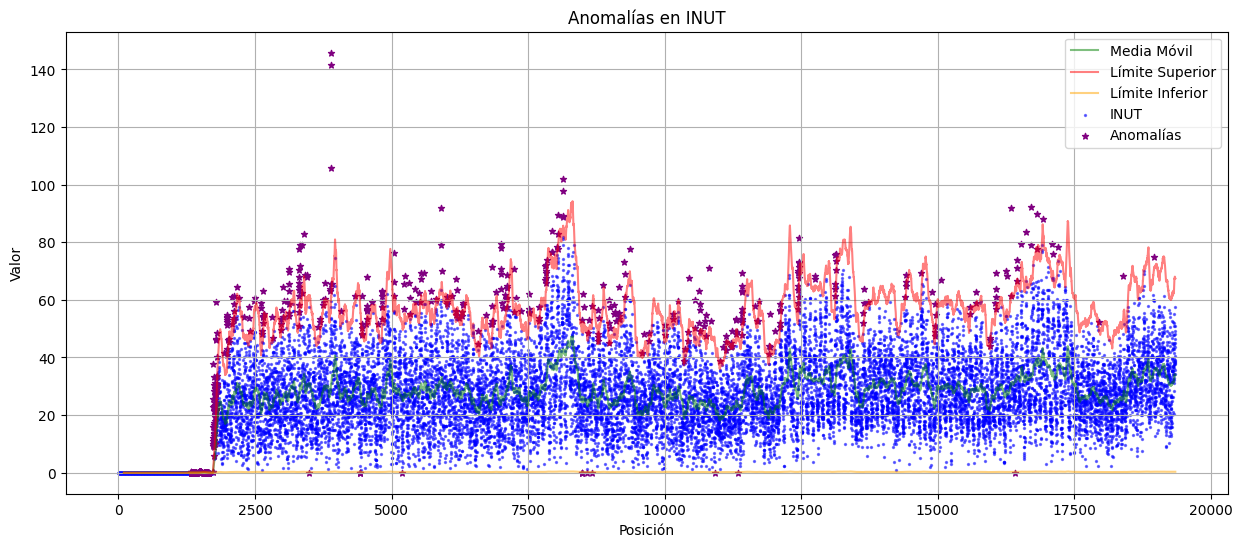

In [11]:
# Visualiza los resultados

plt.figure(figsize=(15, 6))
plt.plot(df['INUT_rolling_mean'], label='Media Móvil', color='green', alpha=0.5)
plt.plot(upper_threshold, label='Límite Superior', color='red', linestyle='-', alpha=0.5)
plt.plot(lower_threshold, label='Límite Inferior', color='orange', linestyle='-', alpha=0.5)
plt.scatter(range(len(df['INUT'])), df['INUT'], color='blue', s=2, label='INUT', alpha=0.5)
plt.scatter(anomalies_df['Position'], anomalies_df['Anomalous_Value'], color='purple', marker='*', s=20, label='Anomalías')

plt.xlabel('Posición')
plt.ylabel('Valor')
plt.title('Anomalías en INUT')
plt.legend()
plt.grid(True)
plt.show()

#### Z-Score

In [12]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
# Pon aquí tu código
df['INUT_zscore'] = (df['INUT'] - df['INUT'].mean()) / df['INUT'].std()

In [13]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)
# Se usa 3 veces la desviacion estandar debido a que en ese rango se encuentra el 99.7% de lo datos
threshold = 3

# Se crea un dataframe con las anomalias
anomaliesz_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Se calcula y se agregan al dataframe los valores que se salen de ese rango
for i in range(len(df)):
  if df['INUT_zscore'][i] > threshold or df['INUT_zscore'][i] < -threshold:
    anomaliesz_df = pd.concat([anomaliesz_df, pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'][i]]})], ignore_index=True)

# Se muestran esos valores
anomaliesz_df

<ipython-input-13-a169eaab77ef>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomaliesz_df = pd.concat([anomaliesz_df, pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'][i]]})], ignore_index=True)


,Position,Anomalous_Value
0,3309,77.6
1,3315,79.0
2,3318,71.8
3,3359,78.9
4,3393,83.0
...,...,...
67,17096,79.5
68,17103,75.8
69,17200,73.4
70,17201,78.4


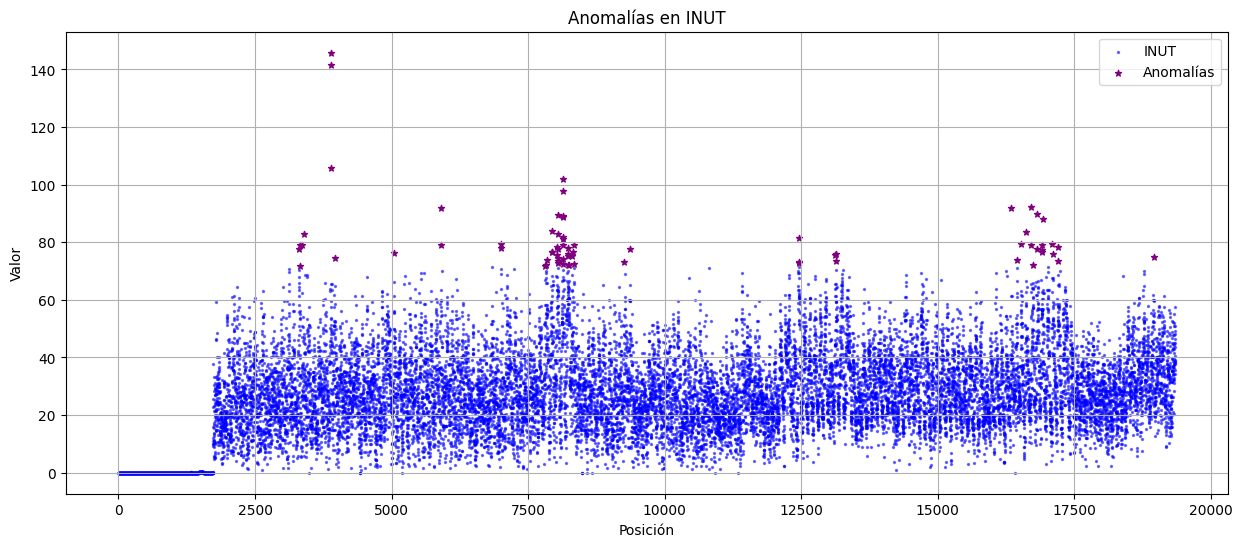

In [14]:
# Visualiza los resultados

plt.figure(figsize=(15, 6))
plt.scatter(range(len(df['INUT'])), df['INUT'], color='blue', s=2, label='INUT', alpha=0.5)
plt.scatter(anomaliesz_df['Position'], anomaliesz_df['Anomalous_Value'], color='purple', marker='*', s=20, label='Anomalías')

plt.xlabel('Posición')
plt.ylabel('Valor')
plt.title('Anomalías en INUT')
plt.legend()
plt.grid(True)
plt.show()

#### Isolation Forest

In [15]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
# Pon aquí tu código
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
cols = ['writing score', 'reading score', 'math score']

In [17]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales


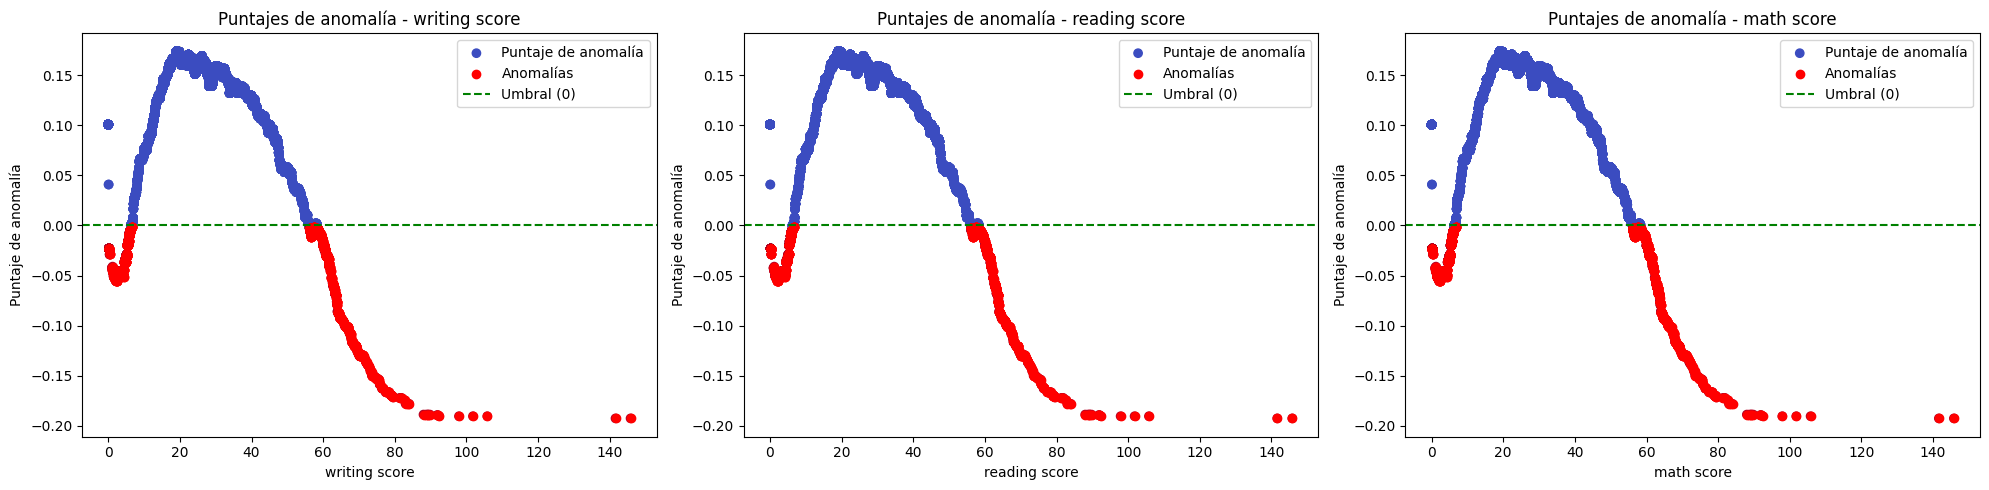

In [18]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
# Crear figura para visualizar
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    # Entrenando Isolation Forest en la columna
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    isolation_forest.fit(df['INUT'].values.reshape(-1, 1))

    # Obteniendo puntajes de anomalía y predicciones
    anomaly_score = isolation_forest.decision_function(df['INUT'].values.reshape(-1, 1))
    outliers = isolation_forest.predict(df['INUT'].values.reshape(-1, 1))

    # Visualizar puntajes de anomalía
    axs[i].scatter(df['INUT'], anomaly_score, c=(outliers == -1), cmap='coolwarm', label='Puntaje de anomalía')

    # Marcar anomalías
    axs[i].scatter(
        df['INUT'][outliers == -1],
        anomaly_score[outliers == -1],
        color='red',
        label='Anomalías'
    )

    # Configuración del gráfico
    axs[i].set_title(f'Puntajes de anomalía - {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Puntaje de anomalía')
    axs[i].axhline(y=0, color='g', linestyle='--', label='Umbral (0)')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

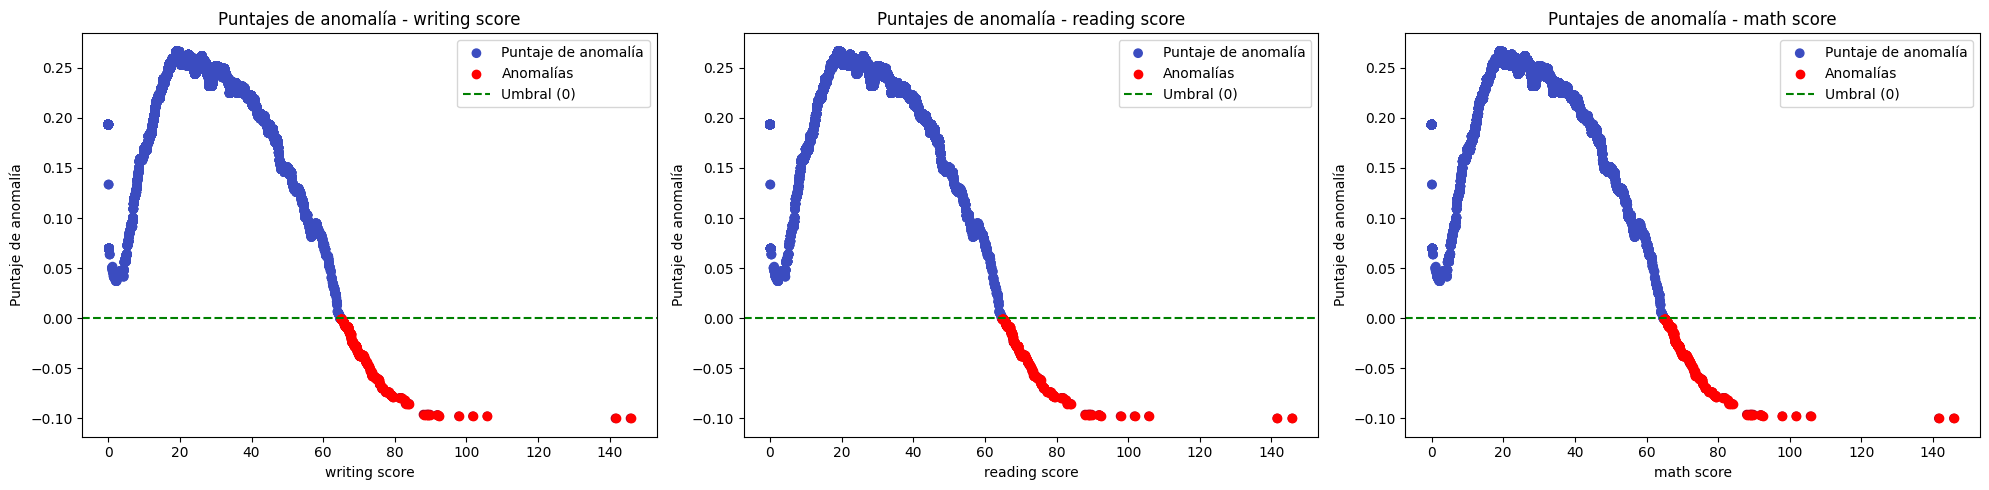

In [19]:
# Repite los pasos anteriores con el parámetro de contamination en 1%
# Crear figura para visualizar
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    # Entrenando Isolation Forest en la columna
    isolation_forest = IsolationForest(contamination=0.01, random_state=42)
    isolation_forest.fit(df['INUT'].values.reshape(-1, 1))

    # Obteniendo puntajes de anomalía y predicciones
    anomaly_score = isolation_forest.decision_function(df['INUT'].values.reshape(-1, 1))
    outliers = isolation_forest.predict(df['INUT'].values.reshape(-1, 1))

    # Visualizar puntajes de anomalía
    axs[i].scatter(df['INUT'], anomaly_score, c=(outliers == -1), cmap='coolwarm', label='Puntaje de anomalía')

    # Marcar anomalías
    axs[i].scatter(
        df['INUT'][outliers == -1],
        anomaly_score[outliers == -1],
        color='red',
        label='Anomalías'
    )

    # Configuración del gráfico
    axs[i].set_title(f'Puntajes de anomalía - {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Puntaje de anomalía')
    axs[i].axhline(y=0, color='g', linestyle='--', label='Umbral (0)')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Local Outlier Factor

In [28]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
# Pon aquí tu código
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
X = df[['VL31','INUT']].values
y_pred = clf.fit_predict(X)

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]


In [21]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales

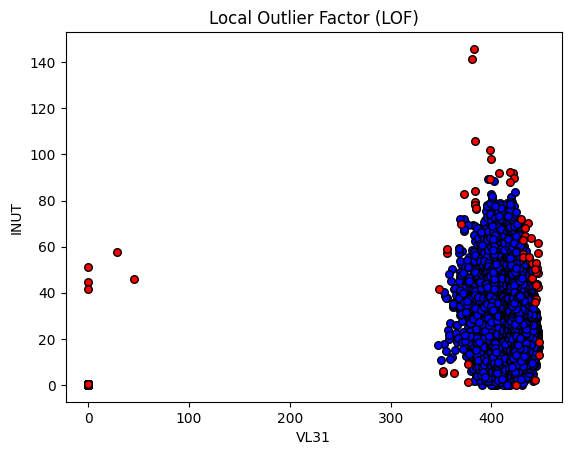

In [29]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.title("Local Outlier Factor (LOF)")
# puntos normales
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('VL31');
plt.ylabel('INUT');
plt.show()

## Análisis

In [23]:
# Realiza un análisis detallado de los resultados obtenidos en cada una de las técnicas aplicadas. Utiliza gráficos o trablas para apoyar tu conclusiones

## Artículos de investigación

#### Artículo 1

In [24]:
# Coloca en este espacio el análisis del artículo 1

#### Artículo 2

In [25]:
# Coloca en este espacio el análisis del artículo 2